## Import Libraries 

In [30]:
import matplotlib.pyplot as plt

#  A question of going down Mt. Fuji
Gradient descent is likened to going down a mountain or valley. You will learn the gradient descent method by creating a descent program from Mt. Fuji, as **if it were an objective function that you want** to minimize.

# Descend from Mt. Fuji
### Acquisition of elevation data 
Elevation data will be distributed in csv file. You can load it with the following code.

```python
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
```

When you output a part, the contents are as follows.

<img src="https://t.gyazo.com/teams/diveintocode/f9ac3aedf7255ba7e01eab296e647bfd.png" title="CSV"/>

In order from the left, "the number of that point", "latitude", "longitude", "elevation", and "distance from point 0". The units of altitude and distance are meters. Data for 300 locations.

### 《Source》:
The data used this time was obtained using the cross-section function of the Geospatial Information Authority's digital topographic map. Elevation data at 300 points on the line from Sagami Bay to the Southern Alps area near the summit of Mt. Fuji.


[3D map (main mountains of Japan)](https://cyberjapandata.gsi.go.jp/3d/mountain/mountain.html)※This is a Japanese reference. An English reference is as below. https://en.wikipedia.org/wiki/List_of_mountains_and_hills_of_Japan_by_height

### Load Dataset

In [31]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [4]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## Problem 1: Visualization of data
Visualize elevation data using Matplotlib. If you set "the number of the point" on the horizontal axis and "elevation" on the vertical axis, you can draw a cross-sectional view of Mt. Fuji.

<img src="https://t.gyazo.com/teams/diveintocode/26a36a37e10a21987e7417a2bb4409eb.png" title="Mt. Fuji"/>

You can easily see the low place by looking at this cross section, but this time imagine the situation where only the slope of your feet is known in the dark.

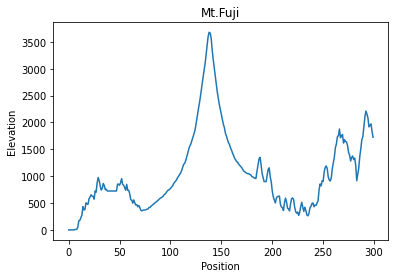

In [11]:
%matplotlib inline
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.title("Mt.Fuji")
_ = plt.plot(fuji[:,0],fuji[:,3])

## Problem 2: Create a function to calculate the slope of a point
In "Two-dimensional array and gradient problem", the gradient at each point was first obtained. However, if you imagine Mt. Fuji in the darkness, all you can know is the slope of your current location.


Create a function that calculates the slope based on the relationship between the "current point number" and the "current point number (the current point number-1)".


The slope was calculated by the following formula. In this data, the "elevation" corresponds to y and the "point number" corresponds to x.

![gradient](https://s3.us-west-1.amazonaws.com/st.wovn.io/ImageValue/production/5e72d3f270b317398ef7dae0/en/https!*!3A!*!2F!*!2Ft.gyazo.com!*!2Fteams!*!2Fdiveintocode!*!2F7fd04c4808b8a0150a49c908e21f3cd2.png)

In [141]:
def grad(ndarray):
    return (ndarray[1:,3]-ndarray[0:-1,3])/(ndarray[1:,0]-ndarray[0:-1,0])
gradient = grad(fuji)
gradient

array([   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    6.62,    0.59,
          4.99,   42.21,  117.15,    6.28,   50.37,   47.17,  158.38,
        -62.02,    8.32,  123.34,  -18.01,   -7.57,  102.68,   30.42,
         44.04,  -26.74,   -1.58,  -54.09,  151.4 ,  -22.01,  177.53,
         96.7 ,  -57.01, -102.16,  -73.94,   27.86,   93.14,  -37.54,
        -78.13,    7.72,  -31.61,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,  127.68,   -0.82,
        -20.36,   49.44,   74.7 , -105.62,  -17.92,  -41.59,  -51.04,
        109.86, -110.53,   -1.82,  -64.24, -108.22,  -11.79,  -54.82,
         60.87,  -55.26,  -40.69,    7.33,  -40.17,   24.72,  -41.94,
        -49.98,   -6.61,   13.23,    2.13,    0.15,    6.43,    9.02,
          3.5 ,   28.27,    2.19,   22.4 ,   15.66,   13.16,   16.58,
         16.7 ,   14.44,   17.  ,   17.1 ,   21.43,   13.92,   13.37,
         10.68,   18.67,   28.72,   11.93,   27.79,   25.57,   15.45,
         12.51,   18

## Problem 3: Create a function to calculate the destination
Create a function that calculates the next destination based on the information on the slope of the current location.


Expressed as a formula "Destination point = current location-
α
× Gradient at the current location” . Will be.


Use the return value of the function created in question 2 for the "gradient at the current point". 
α
 is the hyper-parameters to take any value greater than 0. In the field of machine learning, it is called the learning rate. The way of descending changes depending on this value. Here, for example, Settings it to 0.2.
 
 <<**Precautions for mounting**>>
 
 When calculating the above formula, a floating point number appears at the destination point, but in order to obtain the gradient information this time, the point must be represented by an integer. Therefore, please convert by rounding. In addition, it is necessary to process the value when it becomes impossible. For example, if the destination point becomes negative, there will be no such data, and the slope cannot be obtained next.
 
<<**What is a hyperparameter?**>>

In a machine learning method, it is a value that cannot be optimized by the method itself. The settings should be done with caution, as the value will change the behavior of the technique and affect the success of the learning. The simplest thing is that humans think of it as Settings, but there are also methods for mechanically determining hyperparameters.

In [99]:
import math
def destination(x,gradient,alpha = 0.2):
    """
        Input:
            x: current destination 
            alpha: learning rate (default 0.2)
            gradient
        Output:
            Next destination point
    """
    return round(x - alpha*gradient)

## Problem 4: Creating a function to go down the mountain
Create a function that goes down the mountain. Take the first point and update it with the function in question 3. Record the location of each move in a list, etc., and use this as the return value of the function.


The first "current point" is the 136th point (elevation 3434.59 [m]) near the top of Mt. Fuji. Let's go down the mountain from here.

<<**Precautions for mounting**>>

Due to rounding in question 3, the destination point may be the same as the one you are in. It means that the amount of movement has decreased, so please judge that you have descended the mountain at that time. This is not the case with the actual gradient descent method.

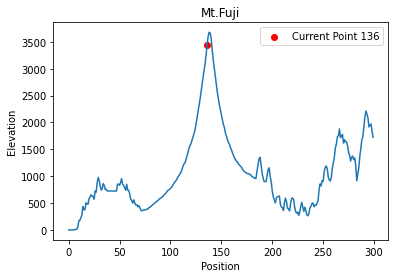

In [146]:
%matplotlib inline
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.title("Mt.Fuji")
_ = plt.plot(fuji[:,0],fuji[:,3])
_ = plt.scatter(136,fuji[136,3],c="Red",label="Current Point 136")
_ = plt.legend()

#### Going down mean going to the left side in the graph
<li> Alpha = 0.3 </li>

In [171]:
def go_down(first_point):
    """
        Input: 
            Index of first point
        Output:
            List of elevation base on gradient
    """
    dest = [fuji[first_point,3]]
    while first_point >= 0:
        dest.append(destination(dest[-1],gradient[first_point],0.3))
        first_point -= 1
    return dest
first_point = 136
down_road = go_down(136)
down_road

[3434.59,
 3385,
 3334,
 3280,
 3244,
 3201,
 3164,
 3122,
 3081,
 3045,
 3012,
 2976,
 2939,
 2908,
 2888,
 2871,
 2851,
 2833,
 2822,
 2805,
 2782,
 2761,
 2741,
 2725,
 2719,
 2703,
 2685,
 2671,
 2663,
 2653,
 2645,
 2633,
 2626,
 2618,
 2610,
 2598,
 2591,
 2584,
 2578,
 2574,
 2569,
 2561,
 2553,
 2549,
 2540,
 2534,
 2531,
 2527,
 2523,
 2517,
 2512,
 2507,
 2503,
 2498,
 2493,
 2489,
 2484,
 2477,
 2476,
 2468,
 2467,
 2464,
 2462,
 2462,
 2461,
 2457,
 2459,
 2474,
 2487,
 2480,
 2492,
 2490,
 2502,
 2519,
 2501,
 2517,
 2521,
 2553,
 2572,
 2573,
 2606,
 2573,
 2588,
 2600,
 2605,
 2637,
 2615,
 2600,
 2606,
 2606,
 2568,
 2568,
 2568,
 2568,
 2568,
 2568,
 2568,
 2568,
 2568,
 2568,
 2577,
 2575,
 2598,
 2609,
 2581,
 2573,
 2595,
 2626,
 2643,
 2614,
 2561,
 2568,
 2523,
 2539,
 2539,
 2547,
 2534,
 2525,
 2494,
 2496,
 2501,
 2464,
 2462,
 2481,
 2433,
 2419,
 2404,
 2402,
 2367,
 2354,
 2353,
 2353,
 2351,
 2351,
 2351,
 2351,
 2351,
 2351]

## Problem 5: Visualization of the descent process
Visualize the descending process in problem 4 using Matplotlib.


《**Visualization example**》


<li>Display points moved in cross section as dots </li>
<li>Make a line graph of the altitude and slope for each iteration</li>


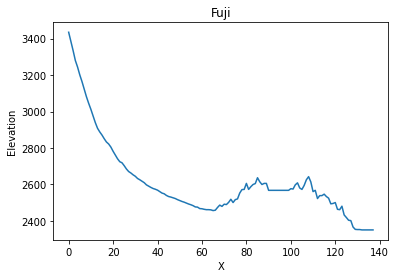

In [157]:
%matplotlib inline
plt.xlabel("X")
plt.ylabel("Elevation")
plt.title("Fuji")
_ = plt.plot(range(len(down_road)),down_road)

## Problem 6: Change of initial value
In Question 4, the first "where you are" is 136, but calculate this for all other points. Then, visualize what kind of descent process will occur for some initial values as in Problem 5. In machine learning **initial value** you can see that how your settings it affects the result.


<<**What is the initial value?**>>


The value like the first point in this example is called the initial value. If you change this, the result will change. For example, at 136 and 142 you will be descending different slopes of Mt. Fuji.

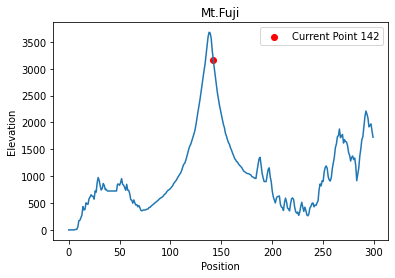

In [149]:
%matplotlib inline
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.title("Mt.Fuji")
_ = plt.plot(fuji[:,0],fuji[:,3])
_ = plt.scatter(142,fuji[142,3],c="Red",label="Current Point 142")
_ = plt.legend()

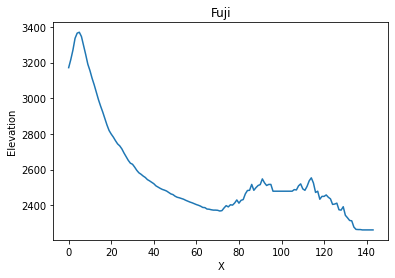

In [160]:
"""Go down form 142 """
def go_down(first_point):
    dest = [fuji[first_point,3]]
    while first_point >= 0:
        dest.append(destination(dest[-1],gradient[first_point],0.3))
        first_point -= 1
    return dest
first_point = 142
down_road = go_down(142)
%matplotlib inline
plt.xlabel("X")
plt.ylabel("Elevation")
plt.title("Fuji")
_ = plt.plot(range(len(down_road)),down_road)

## Problem 7: (Advance problem) Change hyperparameters
Hyper parameter 
**α**
Visualize the descending process when you change as in question 5. And make sure that the results vary greatly depending on the hyperparameters.

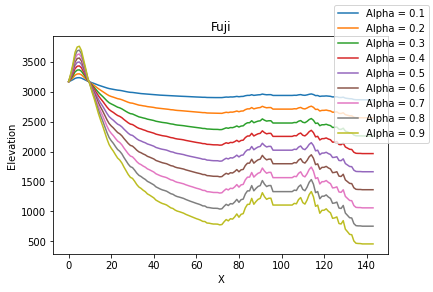

In [170]:
def go_down(first_point,alpha):
    dest = [fuji[first_point,3]]
    while first_point >= 0:
        dest.append(destination(dest[-1],gradient[first_point],alpha))
        first_point -= 1
    return dest
a_0_1= go_down(first_point,0.1)
a_0_2= go_down(first_point,0.2)
a_0_3= go_down(first_point,0.3)
a_0_4= go_down(first_point,0.4)
a_0_5= go_down(first_point,0.5)
a_0_6= go_down(first_point,0.6)
a_0_7= go_down(first_point,0.7)
a_0_8= go_down(first_point,0.8)
a_0_9= go_down(first_point,0.9)
%matplotlib inline
plt.xlabel("X")
plt.ylabel("Elevation")
plt.title("Fuji")
_ = plt.plot(range(len(down_road)),a_0_1,label="Alpha = 0.1")
_ = plt.plot(range(len(down_road)),a_0_2,label="Alpha = 0.2")
_ = plt.plot(range(len(down_road)),a_0_3,label="Alpha = 0.3")
_ = plt.plot(range(len(down_road)),a_0_4,label="Alpha = 0.4")
_ = plt.plot(range(len(down_road)),a_0_5,label="Alpha = 0.5")
_ = plt.plot(range(len(down_road)),a_0_6,label="Alpha = 0.6")
_ = plt.plot(range(len(down_road)),a_0_7,label="Alpha = 0.7")
_ = plt.plot(range(len(down_road)),a_0_8,label="Alpha = 0.8")
_ = plt.plot(range(len(down_road)),a_0_9,label="Alpha = 0.9")
_ = plt.figlegend()